# Python Web Scrapping Project

### Objective of the Project :
- To harvest data from WIKIPEDIA about "List of international cricket centuries at the WACA Ground".
- Clean the data and perform Data Visualistation
- Gain insights about the same from the visualisation

## WEB SCRAPPING
 - Collect data from web & store it in a file

In [13]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
url = 'https://en.wikipedia.org/wiki/List_of_international_cricket_centuries_at_the_WACA_Ground'

r = requests.get(url)
html_doc = r.text
soup = BeautifulSoup(html_doc) #Create soup
table = soup.table #extract the first table component from the soup
table_rows = table.find_all('tr') #find all tr tags inside that table
rows = []

In [8]:
for tr in table_rows: #accessing each row
    tds = tr.find_all('td') #find all td tags inside the tr tags
    row = []
    name_index = 2 #player name column
    count = 0
    for td in tds: #accessing each column of a row
        
        if count == name_index:
            row.append(td.text.strip(' (1/2) (2/3) (3/3) \n \t')) #strip extra things from the name column
        
        else:
            row.append(td.text.strip()) #strip whitespaces from the columns
            
        count += 1
    rows.append(row)

In [9]:
#Print first 5 rows
for i in range(5):
    print(rows[i])

[]
['1', '131', 'Brian Luckhurst', 'England', '301', '1', 'Australia', '11 December 1970', 'Drawn']
['2', '171', 'Ian Redpath', 'Australia', '372', '2', 'England', '11 December 1970', 'Drawn']
['3', '108', 'Greg Chappell', 'Australia', '218', '2', 'England', '11 December 1970', 'Drawn']
['4', '115*', 'John Edrich', 'England', '332', '3', 'Australia', '11 December 1970', 'Drawn']


In [10]:
heads = []
ths = table_rows[0].find_all('th') #find all the th(table heading) tags from the table
for th in ths:
    heads.append(th.text.strip()) #strip whitespaces
print(heads)

['No.', 'Score', 'Player', 'Team', 'Balls', 'Inns.', 'Opposing team', 'Date', 'Result']


In [11]:
df = pd.DataFrame(rows, columns=heads) #create dataframe using the row data extracted to the list and set columns as headings extracted
df.drop(0,inplace=True) #drop the 1st row, inplace performs the action on the same data frame
df.reset_index(inplace=True,drop=True) #reset the index so it starts from 0
print(df) #print the data frame

   No. Score           Player          Team Balls Inns. Opposing team  \
0    1   131  Brian Luckhurst       England   301     1     Australia   
1    2   171      Ian Redpath     Australia   372     2       England   
2    3   108    Greg Chappell     Australia   218     2       England   
3    4  115*      John Edrich       England   332     3     Australia   
4    5   115     Ross Edwards     Australia   252     2       England   
..  ..   ...              ...           ...   ...   ...           ...   
84  85   141        JP Duminy  South Africa   225     3     Australia   
85  86   140      Dawid Malan       England   227     1     Australia   
86  87   119   Jonny Bairstow       England   215     1     Australia   
87  88   239      Steve Smith     Australia   399     2       England   
88  89   181   Mitchell Marsh     Australia   236     2       England   

                Date Result  
0   11 December 1970  Drawn  
1   11 December 1970  Drawn  
2   11 December 1970  Drawn  
3  

In [12]:
df.to_csv('waca_test_centuries.csv', sep=',',index=False) #save the dataframe as a csv file

## Getting Insights & Data Visualisation

In [14]:
data = pd.read_csv('waca_test_centuries.csv') 

In [15]:
print('Number of centuries are:',data.shape[0]) #print the shape of the data frame

Number of centuries are: 89


### Q1. Number of centuries scored by each country at WACA Ground

           Team  No.
0     Australia   47
1       England   12
2         India    3
3   New Zealand    8
4      Pakistan    3
5  South Africa    7
6     Sri Lanka    1
7   West Indies    8


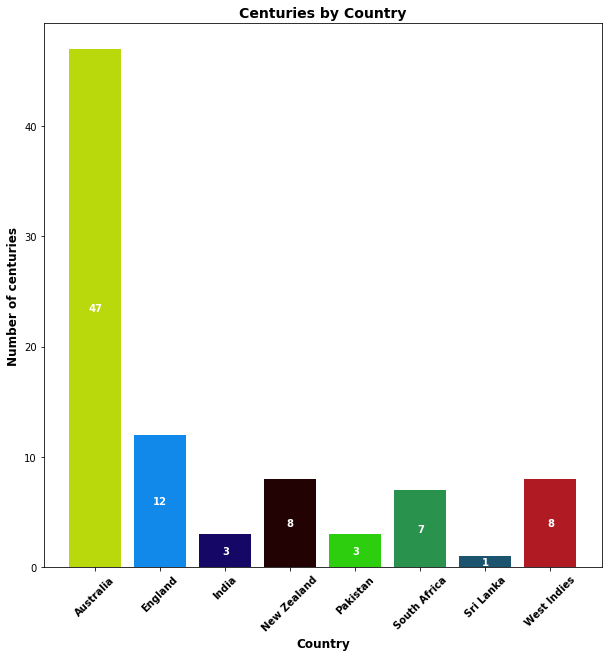

In [28]:
plt.figure(figsize=(10,10)) # Specify the figure size beforehand

# Grouping by Team on basis of count of centuries
df=data[['No.','Team']].groupby(['Team'],as_index=False).count() #if as_index=True, return object with group labels as the index
y=df['No.']  #extract only the No. column
labels=df['Team'] #extract only the Team column x axis
print(df)

bar = plt.bar(labels,y,color = ['#b9d90d', '#1089ea', '#140766', '#220202', '#2cce0e', '#29924c', '#1c5470', '#b01b23']) #create a bar plot
plt.xticks(labels,rotation=45,fontweight="bold") #set bar labels on the x axis x ticks are label

# Labelling our plot
plt.title('Centuries by Country',fontsize=14,fontweight="bold") #set the title of the plot
plt.ylabel('Number of centuries',fontsize=12,fontweight="bold") #set the y axis label
plt.xlabel('Country',fontsize=12,fontweight='bold') #set the x axis label
# plt.tight_layout() 

# Displaying value for each bar
for b in bar:
    height = b.get_height()
    #print(b.get_height(),b.get_x(),b.get_width()) get_x() gives starting position of the bar graph
    plt.text(b.get_x()+b.get_width()/2,(height-1)/2,height,ha='center',va='bottom',fontweight="bold",fontsize=10,color="white")
    
plt.show()

### Q2. Result when HOME batsman scores a century

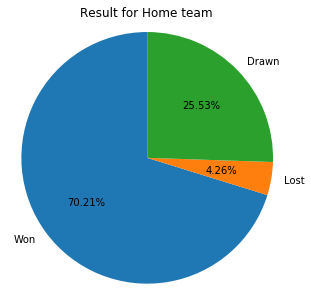

In [29]:
plt.figure(figsize=(5,5)) #x,y 
df = data[['No.','Score','Team','Result']] #select only the specified columns
total_centuries = len(df[df.Team=='Australia']) #find total centuries scored by Australia will give the result and with help of shape we counted total number of rows
# print(total_centuries)
matches_won = len(df[(df.Team=='Australia') & (df.Result=='Won')]) #find total matches of Australia which were won
# print(matches_won)
matches_lost = len(df[(df.Team=='Australia') & (df.Result=='Lost')]) #find total matches of Australia which were lost
matches_drawn = len(df[(df.Team=='Australia') & (df.Result=='Drawn')]) #find total matches of Australia which were drawn
sizes=[matches_won/total_centuries, matches_lost/total_centuries, matches_drawn/total_centuries] #find percentages of matches won, lost and drawn
label=['Won', 'Lost', 'Drawn']
plt.pie(sizes, labels=label, autopct='%.2f%%', startangle=90) #create a pie chart with percent labels on them
plt.axis('equal') #make x and y axis equal
# plt.tight_layout()
plt.title('Result for Home team') #title for the pie chart
plt.show()

### Q3. Result when away batsman scores a century

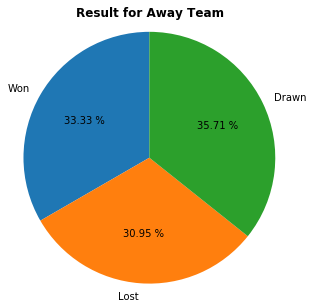

In [30]:
plt.figure(figsize=(5,5))
df=data[['No.','Score','Team','Result']]
total_centuries=df[df.Team!='Australia'].shape[0]
matches_won=len(df[(df.Team!='Australia') & (df.Result=='Won')])
matches_drawn=len(df[(df.Team!='Australia') & (df.Result=='Drawn')])
matches_lost=len(df[(df.Team!='Australia') & (df.Result=='Lost')])
sizes=[matches_won/total_centuries, matches_lost/total_centuries, matches_drawn/total_centuries]
labels=['Won', 'Lost', 'Drawn']
plt.pie(sizes,labels=labels,autopct="%.2f %%",startangle=90)
plt.axis('equal')
# plt.tight_layout()
plt.title("Result for Away Team", fontweight = "bold")
plt.show()

### Q4. Centuries scored in different innings

   Inns.  No.
0      1   29
1      2   25
2      3   29
3      4    6


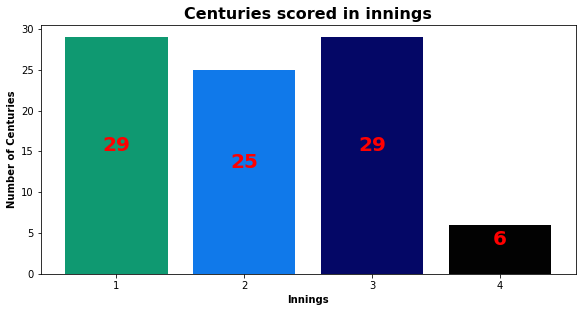

In [32]:
plt.figure(figsize=(8,4))
inns_df=data[['No.','Inns.']].groupby(['Inns.'],as_index=False).count()
print(inns_df)
x=inns_df['Inns.']
y=inns_df['No.']
bar = plt.bar(x,y,color = ['#0f9971', '#1079ea', '#040766', '#020202'])
plt.xticks(x)
for b in bar:
    height=b.get_height()
    plt.text(b.get_x()+b.get_width()/2,height/2,height,color="red",fontweight="bold",ha="center",va="bottom",fontsize=20)
plt.tight_layout()
plt.title("Centuries scored in innings",fontweight="bold",fontsize=16)
plt.xlabel("Innings", fontweight = "bold")
plt.ylabel("Number of Centuries", fontweight = "bold")
plt.show()